<a href="https://colab.research.google.com/github/amine-lbabda/STAI/blob/main/Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the EuroSAT dataset
dataset, info = tfds.load('eurosat/rgb', with_info=True, as_supervised=True)

# Split the dataset into training and testing sets
train_dataset, test_dataset = tfds.load('eurosat/rgb', split=['train[:80%]', 'train[80%:]'], as_supervised=True)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # EuroSAT has 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.fit(train_dataset, epochs=10, validation_data=test_dataset)


Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9086 - loss: 0.2579 - val_accuracy: 0.8472 - val_loss: 0.4720
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9174 - loss: 0.2302 - val_accuracy: 0.8583 - val_loss: 0.4523
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9314 - loss: 0.1965 - val_accuracy: 0.8589 - val_loss: 0.4791
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9389 - loss: 0.1740 - val_accuracy: 0.8511 - val_loss: 0.5623
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9421 - loss: 0.1662 - val_accuracy: 0.8393 - val_loss: 0.6075
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9483 - loss: 0.1516 - val_accuracy: 0.8228 - val_loss: 0.7347
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9455 - loss: 0.1642 - val_accuracy: 0.7941 - val_loss: 0.9791
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9444 - loss: 0.1542 - val_accuracy: 0.

In [5]:
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


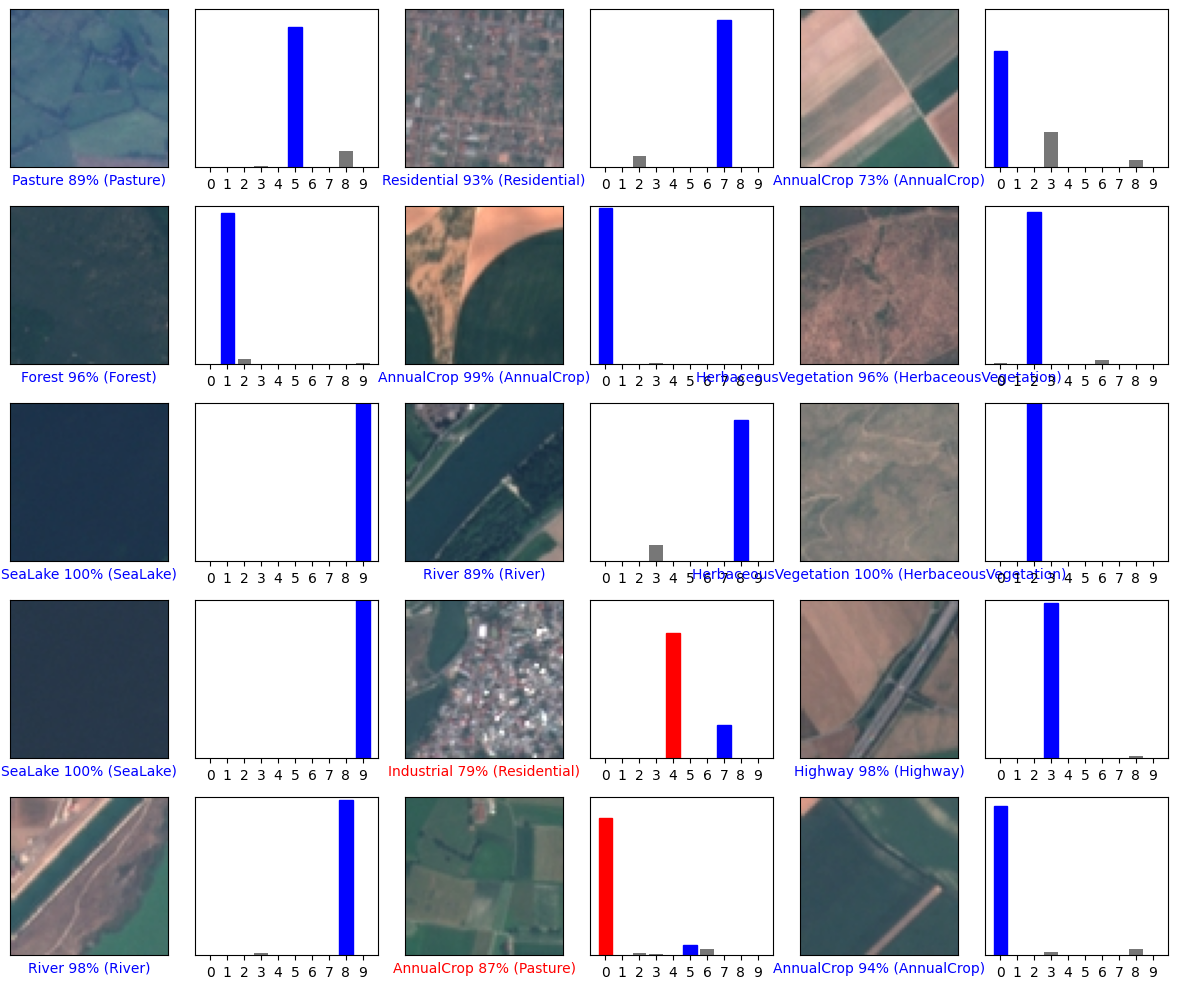

In [7]:
class_names = info.features['label'].names

# Get a batch of images and labels from the test dataset
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)

    # Plot the images and predictions
    num_rows = 5
    num_cols = 3
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

        plt.imshow(images[i].numpy(), cmap=plt.cm.binary)

        predicted_label = tf.argmax(predictions[i])
        true_label = labels[i]

        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'

        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                             100 * tf.reduce_max(predictions[i]),
                                             class_names[true_label]),
                                             color=color)

        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plt.grid(False)
        plt.xticks(range(10))
        plt.yticks([])
        thisplot = plt.bar(range(10), predictions[i], color="#777777")
        plt.ylim([0, 1])
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')

    plt.tight_layout()
    plt.show()
